# CNN手寫數字分類問題-使用Keras

In [17]:
# -*- coding: utf-8 -*-

'''
Trains a simple deep NN on the MNIST dataset.

'''
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils

#for CNN model
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

## Load dataset & pre-processing


In [9]:

nb_classes = 10

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 訓練資料 60000張手寫圖片，28*28*1
# 測試資料 10000張手寫圖片，28*28*1

#X_train = X_train.reshape(60000, 784)
#X_test = X_test.reshape(10000, 784)

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:  #(28,28,1)
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalization: 0-1
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to one hot encoding
# to_categorical(y, nb_classes=None)
# 將類別向量(從0到nb_classes的整數向量)映射成 one hot encoding, 用於應用到以categorical_crossentropy為目標函數的模型中.
# y: 類別向量; nb_classes:總共類別數

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print(Y_train.shape)
print(Y_test.shape)
print(Y_test[0])

60000 train samples
10000 test samples
(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


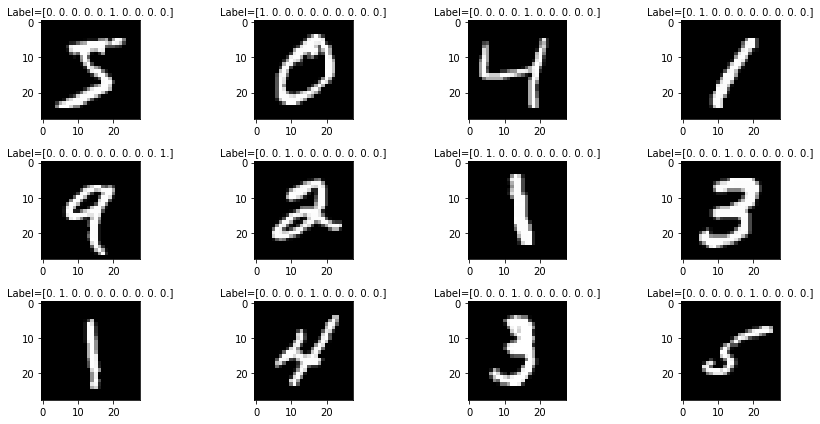

Label = [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [10]:
plt.figure(0, figsize=(12,6))
for i in range(0, 12):
    ax = plt.subplot(3, 4, i+1)
    title = "Label={}".format(str(Y_train[i]))
    ax.set_title(title, fontsize=10)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray') # cmap='binary' 參數設定以黑白灰階顯示(0白,255黑)、cmap='gray' 為0黑,255白

plt.tight_layout()
plt.show()


print("Label = {}".format(Y_train[0:12]))  

## Define a CNN network 

In [21]:


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

print('model.summary:')
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

model.summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0     

## Training (model fit)

In [23]:
# 訓練模型
# Keras以Numpy陣列作為輸入資料和標籤的資料類型
# fit(self, x, y, batch_size=32, nb_epoch=10, verbose=1, callbacks=[], validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None)
# epochs：整數，訓練的輪數，訓練數據將會被遍歷nb_epoch次。Keras中nb開頭的變數均為"number of"的意思
# verbose：日誌顯示，0為不在標準輸出流輸出日誌資訊，1為輸出進度條記錄，2為每個epoch輸出一行記錄
# shuffle：布林值，表示是否在訓練過程中每個epoch前隨機打亂輸入樣本的順序。

# fit函數返回一個History的物件，其History.history屬性記錄了損失函數和其他指標的數值隨epoch變化的情況，如果有驗證集的話，也包含了驗證集的這些指標變化情況
batch_size = 128
nb_epoch = 12

train_history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 171s 3ms/step - loss: 0.1148 - acc: 0.9656 - val_loss: 0.0480 - val_acc: 0.9849
Epoch 2/12
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0742 - acc: 0.9786 - val_loss: 0.0372 - val_acc: 0.9880
Epoch 3/12
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0591 - acc: 0.9823 - val_loss: 0.0355 - val_acc: 0.9888
Epoch 4/12
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0524 - acc: 0.9847 - val_loss: 0.0319 - val_acc: 0.9897
Epoch 5/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0482 - acc: 0.9859 - val_loss: 0.0324 - val_acc: 0.9900
Epoch 6/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0455 - acc: 0.9861 - val_loss: 0.0295 - val_acc: 0.9919
Epoch 7/12
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0434 - acc: 0.9873 - val_loss: 0.0325 - 

In [24]:
from keras.models import load_model
# creates a HDF5 file
#model.save('model_mnist_cnn.h5') 
#load model
#model=load_model ('model_mnist_cnn.h5')

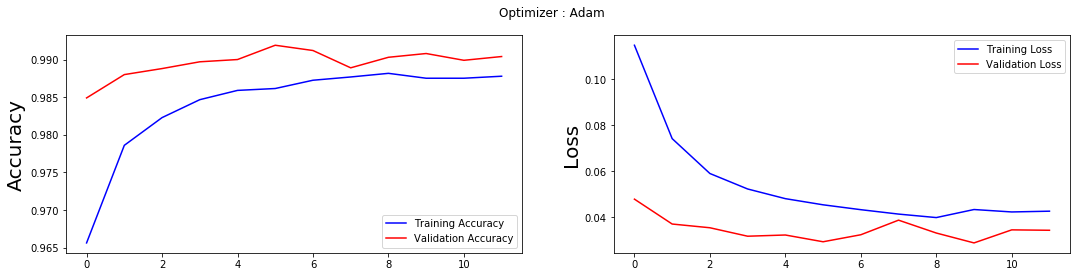

In [25]:
plt.figure(figsize=(18,4))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=12)
plt.ylabel('Accuracy', fontsize=20)
plt.plot(train_history.history['acc'], color='b', label='Training Accuracy')
plt.plot(train_history.history['val_acc'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)

plt.ylabel('Loss', fontsize=20)
plt.plot(train_history.history['loss'], color='b', label='Training Loss')
plt.plot(train_history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.show()

## Model Evaluation

In [26]:

# evaluate(self, x, y, batch_size=32, verbose=1, sample_weight=None)
# 按batch計算在某些輸入資料上模型的誤差
print('-------evaluate--------')
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

-------evaluate--------
10000/10000 [==============================] - 7s 709us/step
Test score: 0.03443877328233721
Test accuracy: 0.9904


## Make a prediction

In [27]:
nVal=X_test.shape[0]
print(nVal)
prob = model.predict(X_test)
#print(prob)
predictions=np.argmax(prob,axis=1)
ground_truth=y_test
print(ground_truth)
#ground_truth=np.argmax(y_test[:],axis=1)
errors = np.where(predictions != ground_truth)[0]
print(errors)
print("Number of errors = {}/{}".format(len(errors),nVal))

10000
[7 2 1 ... 4 5 6]
[ 115  259  321  340  445  582  674  684  924  947 1014 1033 1039 1182
 1226 1232 1247 1260 1319 1393 1527 1530 1709 1717 1737 1754 1790 1878
 1901 2035 2043 2098 2118 2129 2130 2135 2182 2185 2266 2293 2414 2454
 2462 2597 2654 2720 2896 2939 2970 3060 3073 3225 3422 3520 3751 3778
 3808 3853 3906 3941 4007 4065 4176 4497 4507 4536 4571 4575 4639 4740
 4761 5634 5642 5937 5955 5997 6071 6091 6166 6172 6576 6597 6625 6651
 6783 9009 9015 9019 9024 9664 9679 9692 9698 9729 9792 9839]
Number of errors = 96/10000


[[ 976    0    1    1    0    0    0    0    2    0]
 [   0 1127    3    3    0    1    1    0    0    0]
 [   2    0 1023    1    0    0    0    6    0    0]
 [   0    0    0 1008    0    1    0    0    1    0]
 [   0    0    1    0  976    0    1    0    1    3]
 [   0    0    1    8    0  881    1    0    0    1]
 [   4    2    0    1    1    6  943    0    1    0]
 [   0    2    7    2    0    0    0 1014    1    2]
 [   3    1    2    1    0    0    0    2  963    2]
 [   0    0    1    2    5    5    0    2    1  993]]
Confusion matrix, without normalization
[[ 976    0    1    1    0    0    0    0    2    0]
 [   0 1127    3    3    0    1    1    0    0    0]
 [   2    0 1023    1    0    0    0    6    0    0]
 [   0    0    0 1008    0    1    0    0    1    0]
 [   0    0    1    0  976    0    1    0    1    3]
 [   0    0    1    8    0  881    1    0    0    1]
 [   4    2    0    1    1    6  943    0    1    0]
 [   0    2    7    2    0    0    0 1014    1    2]
 [   

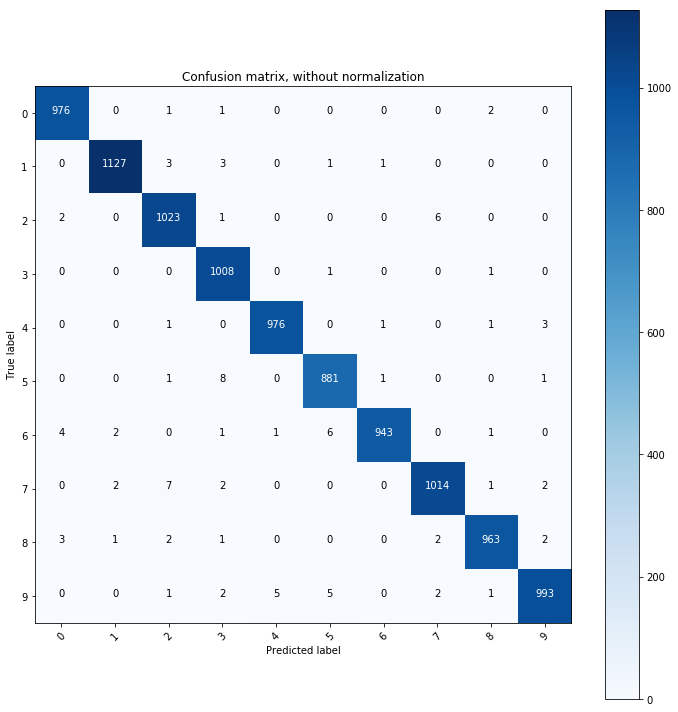

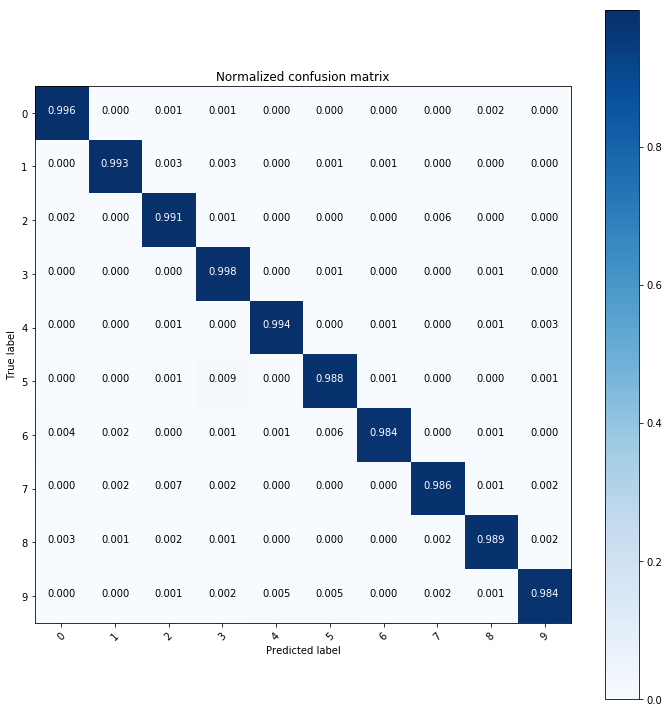

In [29]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
import os,sys
#sys.path.append(os.path.abspath('../../')) #for import common.utility
from common.utility import plot_confusion_matrix

C=confusion_matrix(ground_truth, predictions)
print(C)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(C, classes=range(10),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(C, classes=range(10), normalize=True,
                      title='Normalized confusion matrix')

plt.show()


Image index 0 array:
y_test_label = [4 6 2 5 6 8 5 7 2 8 6 8]
predictions = [9 0 7 3 0 2 3 3 7 9 5 1]


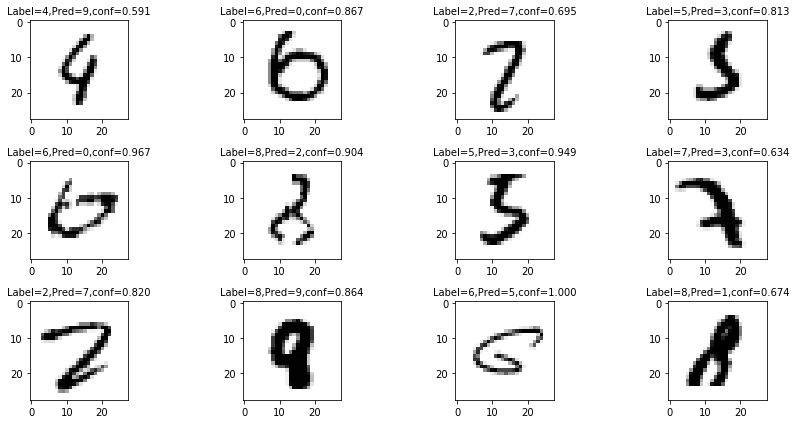

In [30]:
plt.figure(0, figsize=(12,6))

print("\nImage index 0 array:")
print("y_test_label = {}".format(y_test[errors[0:12]])) 
print("predictions = {}".format(predictions[errors[0:12]])) 

#np.set_printoptions(precision=2)
#for i in range(0, 12):
for i in range(0,12):
    pred_label = np.argmax(prob[errors[i]])
    ax = plt.subplot(3, 4, i+1)
    title = "Label={},Pred={},conf={:.3f}".format(str(y_test[errors[i]]),str(predictions[errors[i]]),prob[errors[i]][pred_label])
    ax.set_title(title, fontsize=10)
    plt.imshow(X_test[errors[i]].reshape(28, 28), cmap='binary') # cmap='binary' 參數設定以黑白灰階顯示(0白,255黑)、cmap='gray' 為0黑,255白

plt.tight_layout()
plt.show()